In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd

d = pd.DataFrame(pd.read_csv("/kaggle/input/suicide-rate-and-life-expectancy/Life expectancy.csv"))

d

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,Afghanistan,60.6,68.2,3.794,4.7
1,Albania,74.8,81.3,4.959,1.7
2,Algeria,73.3,78.9,5.605,2.9
3,Andorra,81.7,84.8,6.955,1.4
4,Angola,58.1,65.6,4.105,5.3
...,...,...,...,...,...
137,Qatar,78.1,82.5,6.420,2.3
138,Singapore,82.5,85.9,6.710,1.2
139,United Arab Emirates,76.3,80.6,6.390,2.6
140,United States,76.1,81.1,6.940,1.7


In [3]:
keep_col = ['Life Expectancy (years) - Men','Life Expectancy (years) - Women','Happiness Score','Fertility Rate (births per woman)']
l = d[keep_col]
l

,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,60.6,68.2,3.794,4.7
1,74.8,81.3,4.959,1.7
2,73.3,78.9,5.605,2.9
3,81.7,84.8,6.955,1.4
4,58.1,65.6,4.105,5.3
...,...,...,...,...
137,78.1,82.5,6.420,2.3
138,82.5,85.9,6.710,1.2
139,76.3,80.6,6.390,2.6
140,76.1,81.1,6.940,1.7


In [4]:
l.corr()

,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
Life Expectancy (years) - Men,1.000000,0.986424,0.885471,-0.843142
Life Expectancy (years) - Women,0.986424,1.000000,0.868632,-0.856585
Happiness Score,0.885471,0.868632,1.000000,-0.743444
Fertility Rate (births per woman),-0.843142,-0.856585,-0.743444,1.000000


In [5]:
f = pd.DataFrame(pd.read_csv("/kaggle/input/suicide-rate-and-life-expectancy/Suicide Rate.csv"))
f['GDP per capita'] = f['GDP per capita'].str.replace(',', '').astype(int)
f

,Country,GDP per capita,Suicide rate
0,Afghanistan,1105,20.6
1,Albania,4932,32.4
2,Algeria,4534,15.6
3,Andorra,46622,18.9
4,Angola,2077,20.5
...,...,...,...
135,Spain,29542,11.5
136,Switzerland,83832,12.9
137,United Kingdom,39720,11.1
138,United States,65112,14.0


In [6]:
keep_col = ['GDP per capita','Suicide rate']
l1 = f[keep_col]
l1

,GDP per capita,Suicide rate
0,1105,20.6
1,4932,32.4
2,4534,15.6
3,46622,18.9
4,2077,20.5
...,...,...
135,29542,11.5
136,83832,12.9
137,39720,11.1
138,65112,14.0


In [7]:
l1.corr()

,GDP per capita,Suicide rate
GDP per capita,1.000000,-0.176704
Suicide rate,-0.176704,1.000000


In [8]:
df=pd.merge(d, f, left_on='Country', right_on='Country')
df

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman),GDP per capita,Suicide rate
0,Afghanistan,60.6,68.2,3.794,4.7,1105,20.6
1,Albania,74.8,81.3,4.959,1.7,4932,32.4
2,Algeria,73.3,78.9,5.605,2.9,4534,15.6
3,Andorra,81.7,84.8,6.955,1.4,46622,18.9
4,Angola,58.1,65.6,4.105,5.3,2077,20.5
...,...,...,...,...,...,...,...
127,Philippines,72.0,77.1,5.199,2.8,3150,11.3
128,Poland,77.1,82.9,6.442,1.3,18746,20.3
129,Portugal,82.0,85.5,6.346,1.3,24027,13.2
130,United States,76.1,81.1,6.940,1.7,65112,14.0


In [9]:
keep_col = ['Life Expectancy (years) - Men','Life Expectancy (years) - Women','Happiness Score','Fertility Rate (births per woman)','GDP per capita','Suicide rate']
df = df[keep_col]
df

,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman),GDP per capita,Suicide rate
0,60.6,68.2,3.794,4.7,1105,20.6
1,74.8,81.3,4.959,1.7,4932,32.4
2,73.3,78.9,5.605,2.9,4534,15.6
3,81.7,84.8,6.955,1.4,46622,18.9
4,58.1,65.6,4.105,5.3,2077,20.5
...,...,...,...,...,...,...
127,72.0,77.1,5.199,2.8,3150,11.3
128,77.1,82.9,6.442,1.3,18746,20.3
129,82.0,85.5,6.346,1.3,24027,13.2
130,76.1,81.1,6.940,1.7,65112,14.0


In [10]:
df.corr()

,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman),GDP per capita,Suicide rate
Life Expectancy (years) - Men,1.000000,0.986859,0.894045,-0.842587,0.671999,0.047746
Life Expectancy (years) - Women,0.986859,1.000000,0.882351,-0.855950,0.639335,0.112386
Happiness Score,0.894045,0.882351,1.000000,-0.757311,0.748846,0.011332
Fertility Rate (births per woman),-0.842587,-0.855950,-0.757311,1.000000,-0.462330,-0.295012
GDP per capita,0.671999,0.639335,0.748846,-0.462330,1.000000,-0.154748
Suicide rate,0.047746,0.112386,0.011332,-0.295012,-0.154748,1.000000


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
X = df.drop(['Suicide rate'],axis= 1)
y = df['Suicide rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  61.26683625781111
mean_absolute_error :  6.418594481017222


In [12]:
model.intercept_

-47.826459179673165

In [13]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[-3.552, 4.805, -6.826, -3.962, -0.0]


In [18]:
X = df.drop(['Suicide rate','GDP per capita'],axis= 1)
y = df['Suicide rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  58.38603127338363
mean_absolute_error :  5.993821195413539


In [19]:
model.intercept_

-22.954644163793567

In [20]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[-4.73, 5.649, -7.625, -4.623]


In [21]:
X = df.drop(['Suicide rate','GDP per capita','Fertility Rate (births per woman)'],axis= 1)
y = df['Suicide rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  55.4457273665015
mean_absolute_error :  5.71610383258667


In [22]:
model.intercept_

-95.56795260269594

In [23]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[-5.046, 6.609, -6.014]


In [24]:
X = df.drop(['Suicide rate','GDP per capita','Fertility Rate (births per woman)','Happiness Score'],axis= 1)
y = df['Suicide rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  40.70900087178598
mean_absolute_error :  4.933993879010994


In [25]:
model.intercept_

-59.539347199631024

In [26]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[-5.104, 5.764]


In [27]:
X = df.drop(['Suicide rate','GDP per capita','Fertility Rate (births per woman)','Happiness Score','Life Expectancy (years) - Men'],axis= 1)
y = df['Suicide rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  29.515061434760543
mean_absolute_error :  3.8364793075324095


In [28]:
model.intercept_

-3.7354011000926093

In [29]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[0.255]


In [30]:
X = df.drop(['Suicide rate','Fertility Rate (births per woman)'],axis= 1)
y = df['Suicide rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  60.39064869527142
mean_absolute_error :  6.245162816622013


In [31]:
model.intercept_

-116.43406077478211

In [32]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[-3.284, 5.196, -5.195, -0.0]


In [33]:
X = df.drop(['Suicide rate','Happiness Score'],axis= 1)
y = df['Suicide rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  39.72673029660126
mean_absolute_error :  5.118055720344997


In [34]:
model.intercept_

-27.25985045993835

In [35]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[-3.329, 3.813, -3.102, -0.0]


In [36]:
X = df.drop(['Suicide rate','Life Expectancy (years) - Men'],axis= 1)
y = df['Suicide rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  57.39889400046839
mean_absolute_error :  6.448039485768605


In [37]:
model.intercept_

-30.361002154014137

In [38]:
import numpy as np

coefficients = model.coef_

rounded_coefficients = [round(coef, 3) for coef in coefficients]

print(rounded_coefficients)

[1.228, -6.486, -3.747, -0.0]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

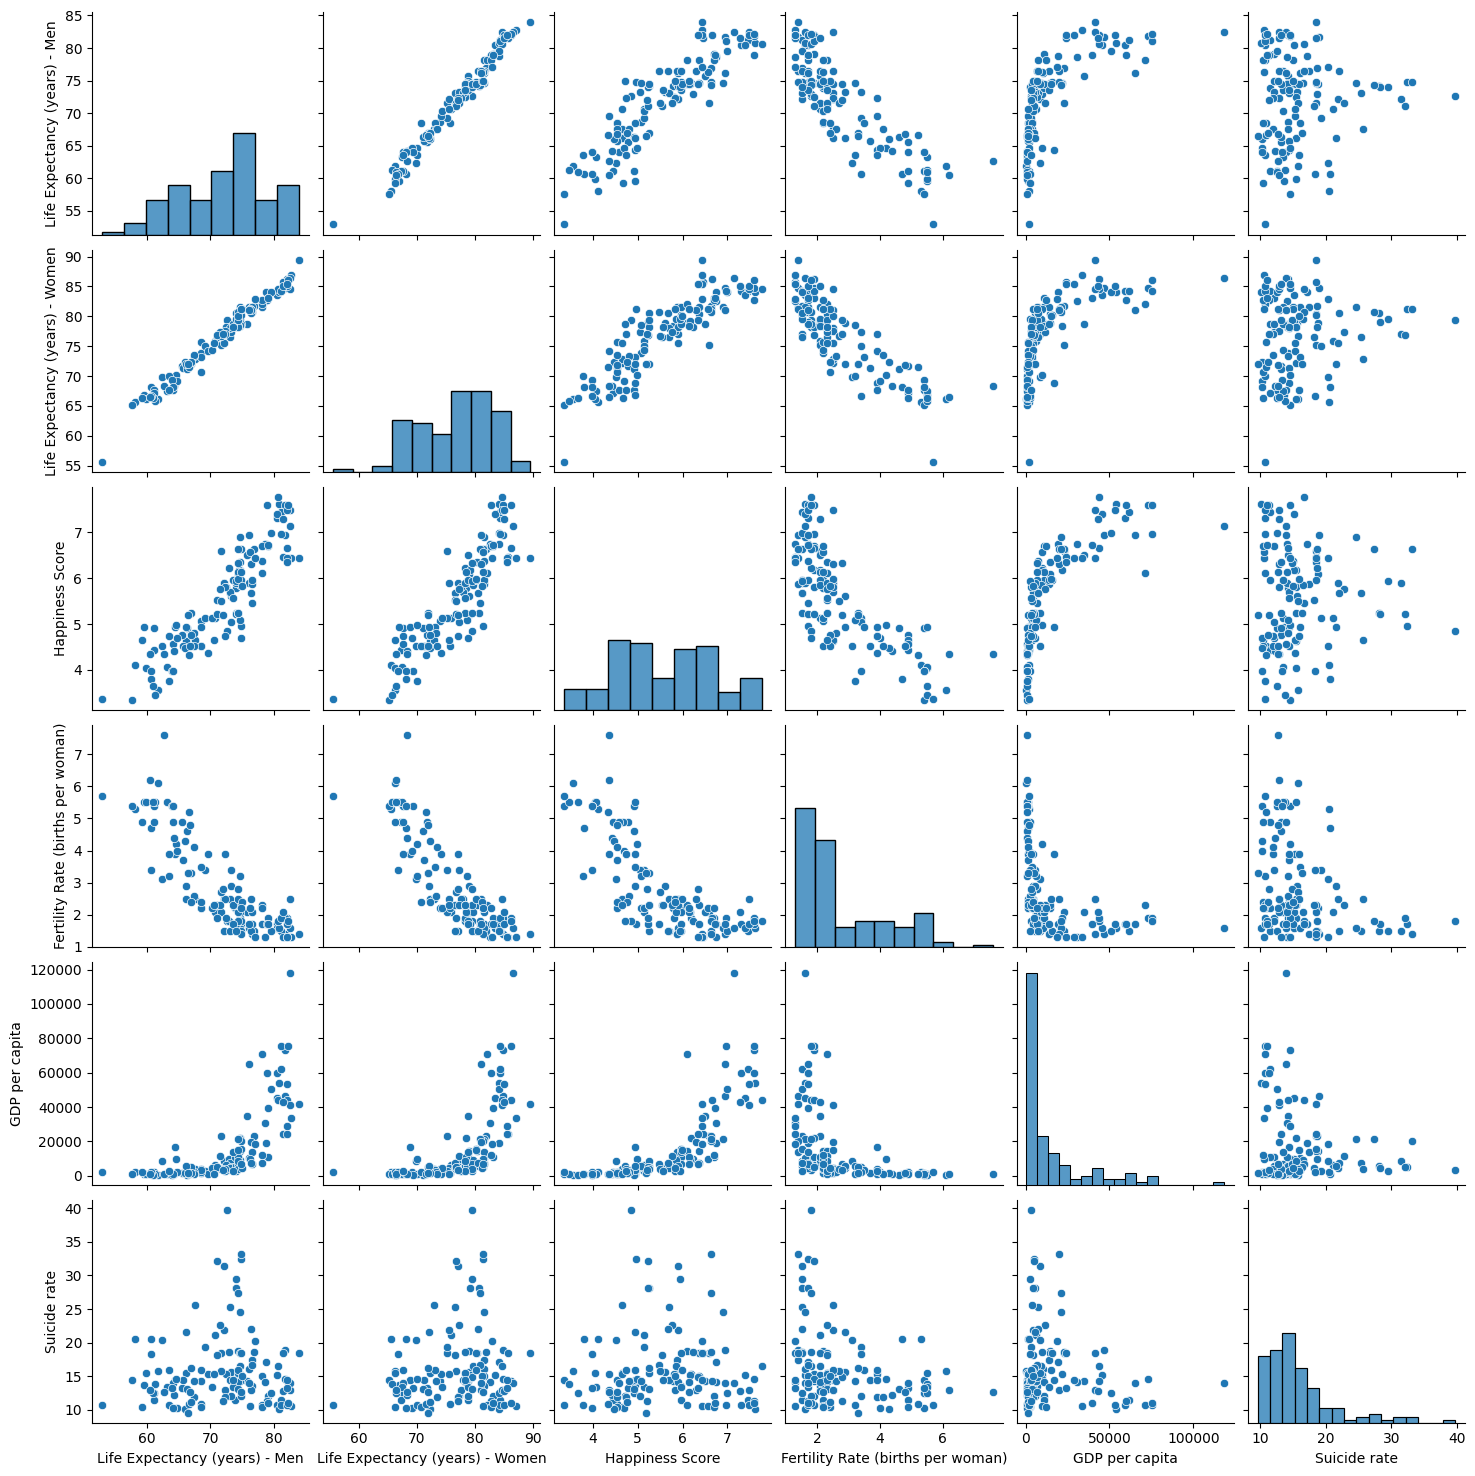

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()